In [ ]:
import sys 
import os

%load_ext autoreload
%autoreload 2
SCRIPT_DIR = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))
sys.path.append(os.path.dirname(SCRIPT_DIR))

import matplotlib.pyplot as plt
import matplotlib
from region_extractor import WorldWrapper


wrapper = WorldWrapper("/home/erzar/repos/MC/data/20250401_April_World_by_McMeddon/20250401 April World 1.12")


INFO - PyMCTranslate Version 363
INFO - Loading level /home/erzar/repos/MC/data/20250401_April_World_by_McMeddon/20250401 April World 1.12


In [ ]:
coords = sorted(wrapper._mca_coords)

inhabited_times = wrapper.mca_inhabited_times(0, 0) 

INFO - NumExpr defaulting to 6 threads.


(32, 32)


<Axes: >

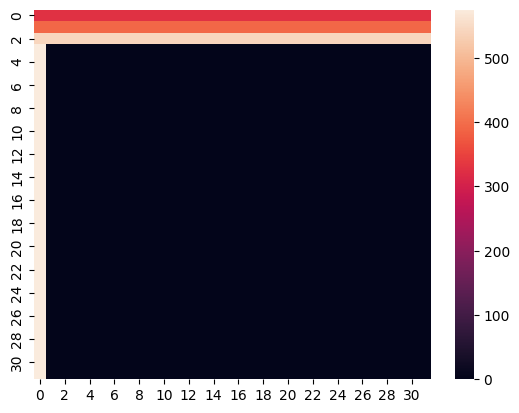

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(inhabited_times.shape)
sns.heatmap(inhabited_times)

In [ ]:
region = wrapper.get_region_volume(0, 0)

In [ ]:
print(wrapper.mca_coords)

((0, -1), (0, 1), (2, 2), (-1, 0), (1, -1), (2, 0), (-1, 1), (0, 0), (1, 2), (0, 2), (1, 1), (1, 0), (2, 1), (2, -1))


In [ ]:

print(wrapper._blockstates._blockstates_dict)

{'universal_minecraft:air': 0, 'universal_minecraft:bedrock[infiniburn="false"]': 1, 'universal_minecraft:stone': 2, 'universal_minecraft:diorite[polished="false"]': 3, 'universal_minecraft:gravel': 4, 'universal_minecraft:andesite[polished="false"]': 5, 'universal_minecraft:diamond_ore': 6, 'universal_minecraft:granite[polished="false"]': 7, 'universal_minecraft:redstone_ore[lit="false"]': 8, 'universal_minecraft:iron_ore': 9, 'universal_minecraft:coal_ore': 10, 'universal_minecraft:dirt': 11, 'universal_minecraft:lapis_ore': 12, 'universal_minecraft:gold_ore': 13, 'universal_minecraft:water[falling="false",flowing="true",level="0"]': 14, 'universal_minecraft:water[falling="false",flowing="false",level="0"]': 15, 'universal_minecraft:sand': 16, 'universal_minecraft:clay': 17, 'universal_minecraft:coarse_dirt': 18, 'universal_minecraft:water[falling="true",flowing="true",level="1"]': 19, 'universal_minecraft:water[falling="true",flowing="false",level="0"]': 20, 'universal_minecraft:lav

In [ ]:
import numpy as np
print(region.shape)

ids, cnts = np.unique(region, return_counts=True)
for block_id, count in sorted(zip(ids, cnts), key=lambda x: x[1], reverse=True):
    print(f"Block ID {block_id}: {count} blocks")

(512, 512, 112)
Block ID 0: 12559589 blocks
Block ID 2: 9592526 blocks
Block ID 15: 1645336 blocks
Block ID 11: 1080854 blocks
Block ID 5: 1070809 blocks
Block ID 7: 1047156 blocks
Block ID 3: 1037569 blocks
Block ID 1: 262095 blocks
Block ID 16: 229088 blocks
Block ID 4: 222267 blocks
Block ID 10: 180225 blocks
Block ID 9: 104046 blocks
Block ID 45: 63775 blocks
Block ID 8: 35968 blocks
Block ID 20: 15469 blocks
Block ID 73: 15175 blocks
Block ID 18: 14724 blocks
Block ID 17: 12980 blocks
Block ID 23: 12447 blocks
Block ID 13: 11860 blocks
Block ID 71: 11169 blocks
Block ID 77: 10188 blocks
Block ID 180: 10052 blocks
Block ID 177: 10023 blocks
Block ID 176: 9777 blocks
Block ID 14: 8457 blocks
Block ID 181: 7713 blocks
Block ID 27: 5871 blocks
Block ID 182: 5368 blocks
Block ID 12: 4571 blocks
Block ID 78: 4506 blocks
Block ID 6: 4445 blocks
Block ID 72: 4263 blocks
Block ID 21: 3846 blocks
Block ID 112: 3837 blocks
Block ID 24: 3817 blocks
Block ID 183: 2962 blocks
Block ID 39: 2558 

In [ ]:
print(sys.getsizeof(region) / (1024 ** 2), "MB")

0.0001373291015625 MB


In [ ]:
import blosc2
import time

time_start = time.time()
compressed_region = blosc2.pack_array2(np.ascontiguousarray(region), chunksize=128**3)
time_end = time.time()
print(sys.getsizeof(compressed_region) / (1024 ** 2), "MB")
print(f"Time taken: {time_end - time_start:.4f} seconds")

2.8646230697631836 MB
Time taken: 0.2803 seconds


In [ ]:
import napari
import numpy as np

import napari
import numpy as np

# 1. Create the viewer first
viewer = napari.Viewer()

# 2. Add your region data
# Note: Napari expects (Z, Y, X) or (Y, X, Z) usually. 
# If it looks 'sideways', use np.transpose(region, (2, 0, 1))
viewer.add_image(region, name='Minecraft Region', interpolation2d="nearest", interpolation3d="nearest", colormap="hsv")


# 3. Start the event loop (this keeps the window open)
napari.run()

WARNING - QSocketNotifier: Can only be used with threads started with QThread
